In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("Births2015.csv")
df.head()

,Unnamed: 0,date,births,wday,year,month,day_of_year,day_of_month,day_of_week
0,1,2015-01-01,8068,Thu,2015,1,1,1,5
1,2,2015-01-02,10850,Fri,2015,1,2,2,6
2,3,2015-01-03,8328,Sat,2015,1,3,3,7
3,4,2015-01-04,7065,Sun,2015,1,4,4,1
4,5,2015-01-05,11892,Mon,2015,1,5,5,2


In [14]:
df.shape

(365, 9)

In [15]:
df.isna().any()

Unnamed: 0      False
date            False
births          False
wday            False
year            False
month           False
day_of_year     False
day_of_month    False
day_of_week     False
dtype: bool

In [16]:
df.describe()

,Unnamed: 0,births,year,month,day_of_year,day_of_month,day_of_week
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000
mean,183.000000,10899.991781,2015.0,6.526027,183.000000,15.720548,4.002740
std,105.510663,2076.683881,0.0,3.452584,105.510663,8.808321,2.000685
min,1.000000,6515.000000,2015.0,1.000000,1.000000,1.000000,1.000000
25%,92.000000,8431.000000,2015.0,4.000000,92.000000,8.000000,2.000000
50%,183.000000,11883.000000,2015.0,7.000000,183.000000,16.000000,4.000000
75%,274.000000,12339.000000,2015.0,10.000000,274.000000,23.000000,6.000000
max,365.000000,13949.000000,2015.0,12.000000,365.000000,31.000000,7.000000


In [17]:
type(df)
#df['births'].unique()
df.mean()

Unnamed: 0        183.000000
births          10899.991781
year             2015.000000
month               6.526027
day_of_year       183.000000
day_of_month       15.720548
day_of_week         4.002740
dtype: float64

<AxesSubplot:>

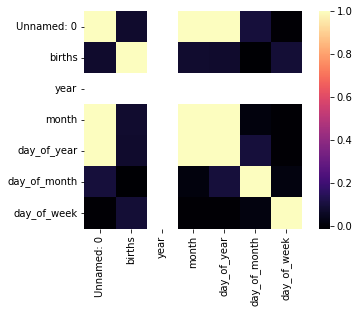

In [18]:
import seaborn as sns
correlation = df.corr()
correlation
sns.heatmap(data=correlation, square=True, cmap="magma")


Problem Statement
We are given a dataset  which consists of monthly totals of international airline passengers,between 1949 to 1960. 
The objective of this analysis and modeling is to review the time series theory.
We will be following an ARIMA modeling procedure of the AirPassengers dataset as followed:
1. Perform exploratory data analysis.
2. Decomposition of data.
3. Test Stationarity.

In [19]:
#loading required libraries
import pandas as pd
import numpy as np 
from datetime import datetime as dt 
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt 
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15, 7

import warnings
warnings.filterwarnings('ignore')


In [20]:
#load the dataset
AirPa = pd.read_csv("AirPassengers.csv")
AirPa.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
#check the data info
AirPa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [22]:
#checking the dimention
AirPa.shape

(144, 2)

In [23]:
#checking the missing value
AirPa.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [24]:
#to display the month
AirPa['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [25]:
# To check the monthly passenger 

AirPa['Month'] = AirPa['Month'].apply(lambda x: dt(int(x[:4]), int(x[5:]),15))
AirPa = AirPa.set_index('Month')
AirPa.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [26]:
#
ts = AirPa['#Passengers']

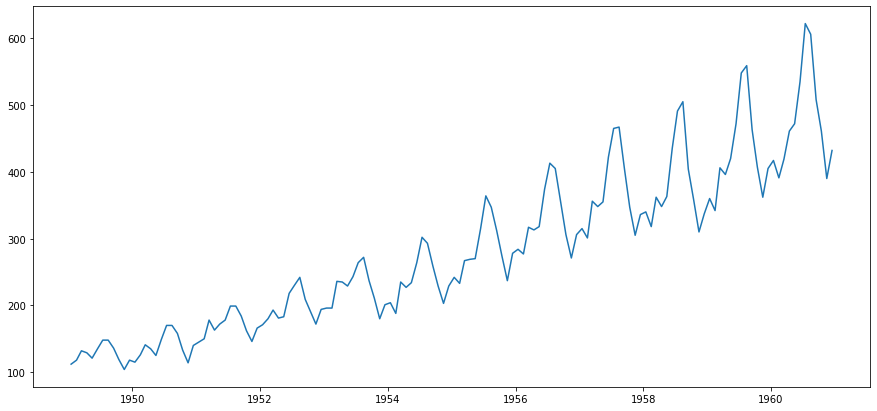

In [27]:
plt.plot(ts)

The above time series we observed overall trends with some seasonality. 

In [28]:
#Transforming ts with log Decomposition
ts_log = np.log(ts)

In [31]:
# Stationarity check using rolling statistics
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window =52, center=False).mean()
    rolstd = timeseries.rolling(window=52, center=False).std()

    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean,color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print("Results of Deckey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used'
                                            ,'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)                                          

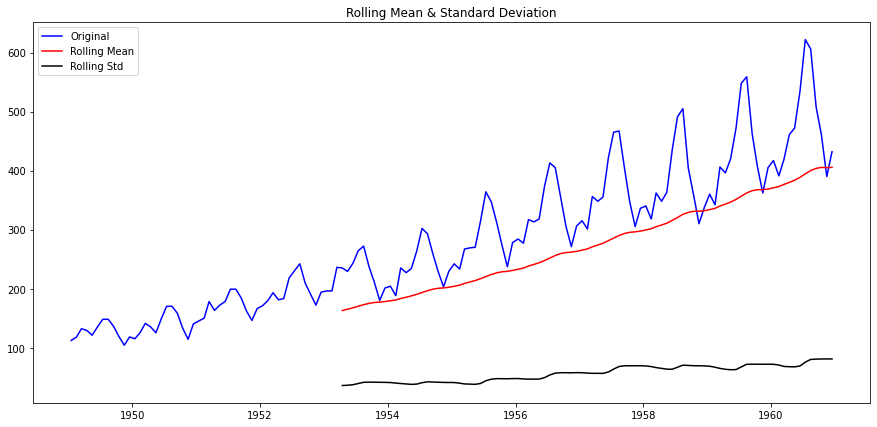

Results of Deckey-Fuller Test:
Test Statistics                  0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [32]:
#Now check the stationarity
test_stationarity(AirPa['#Passengers'])

From the above test result, p-value is < 0.5, so we fail to reject the null hypothesis. So we say that the
timeseries is not stationarity.

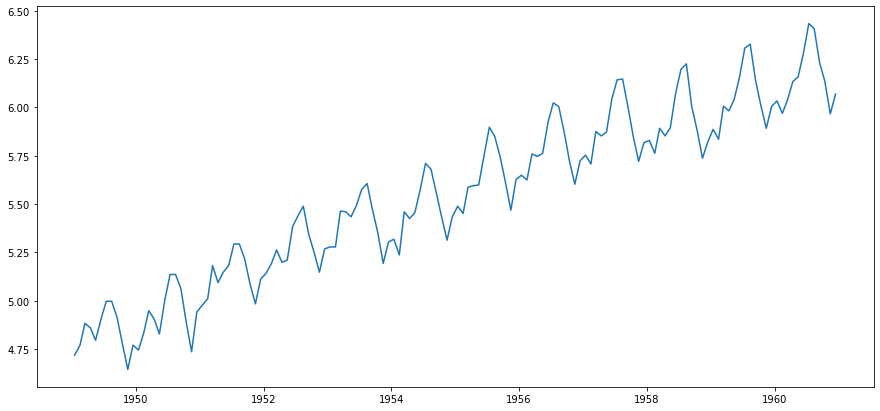

In [34]:
#Checking the Decomposition

plt.plot(ts_log)

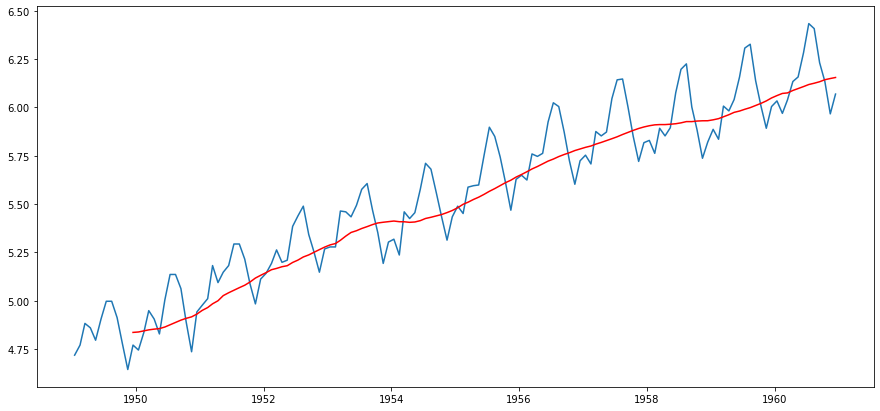

In [38]:
#Initializing the moving average value
movingAverage = ts_log.rolling(window=12).mean()
movingStd = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')
#plt.plot(movingStd)

In [40]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

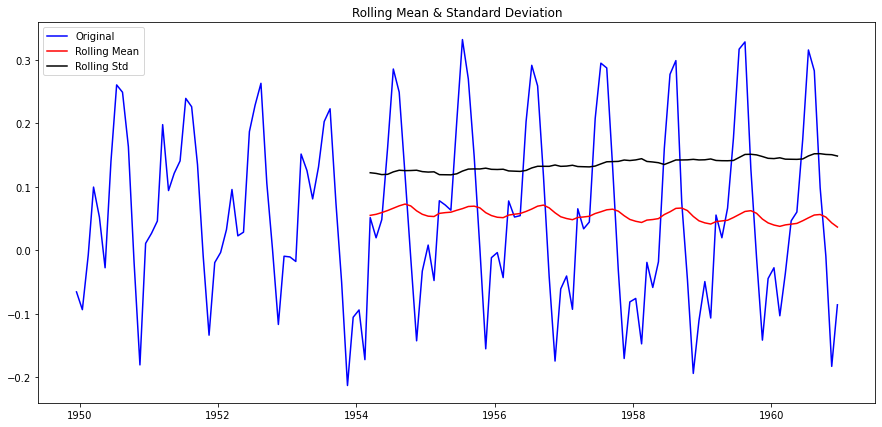

Results of Deckey-Fuller Test:
Test Statistics                 -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [41]:
test_stationarity(ts_log_mv_diff)

From the above result, p-value is less than 0.5, So we may reject the Null hypothesis. So we Time seties is 
statinarity.